In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("restaurants_data_analysis.csv")


In [6]:
df.head()

,budget,is_new_until,latitude,longitude,minimum_delivery_time,minimum_order_amount,minimum_pickup_time,name,post_code,rating,...,vertical_parent,delivery_provider,is_active,is_new,is_promoted,city,timezone,dine_in,main_cuisine,country
0,2,2023-01-08T07:58:20Z,11.578462,104.894039,0,0,15,LG BrandShop (Toul Kork) - Vendor Delivery,12152,0.0,...,Shop,vendor_delivery,True,False,False,Phnom Penh,Asia/Phnom_Penh,False,NaN,Cambodia
1,3,2023-01-08T07:58:40Z,11.589699,104.874987,0,0,15,LG BrandShop (Sen Sok) - Vendor Delivery,12105,0.0,...,Shop,vendor_delivery,True,False,False,Phnom Penh,Asia/Phnom_Penh,False,NaN,Cambodia
2,3,2023-01-08T08:02:26Z,11.544155,104.916032,29810,0,5,LG Brandshop Toul Tompoung - Vendor Delivery,12103,0.0,...,Shop,vendor_delivery,True,False,False,Phnom Penh,Asia/Phnom_Penh,False,NaN,Cambodia
3,3,2023-01-08T07:58:23Z,11.534426,104.885958,29800,0,5,LG Brandshop (Steung Meanchey) - Vendor Delivery,12350,0.0,...,Shop,vendor_delivery,True,False,False,Phnom Penh,Asia/Phnom_Penh,False,NaN,Cambodia
4,3,2023-01-08T07:59:17Z,11.552822,104.883800,29800,0,5,Phum Electronics North Bridge - Vendor Delivery,12102,0.0,...,Shop,vendor_delivery,True,False,False,Phnom Penh,Asia/Phnom_Penh,False,NaN,Cambodia


In [7]:
df.shape

(267378, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267378 entries, 0 to 267377
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   budget                      267378 non-null  int64  
 1   is_new_until                265496 non-null  object 
 2   latitude                    267378 non-null  float64
 3   longitude                   267378 non-null  float64
 4   minimum_delivery_time       267378 non-null  int64  
 5   minimum_order_amount        267378 non-null  int64  
 6   minimum_pickup_time         267378 non-null  int64  
 7   name                        267378 non-null  object 
 8   post_code                   267364 non-null  object 
 9   rating                      267378 non-null  float64
 10  review_number               267378 non-null  int64  
 11  review_with_comment_number  267378 non-null  int64  
 12  vertical                    267377 non-null  object 
 13  vertical_paren

In [9]:
df.isnull().sum()

budget                            0
is_new_until                   1882
latitude                          0
longitude                         0
minimum_delivery_time             0
minimum_order_amount              0
minimum_pickup_time               0
name                              0
post_code                        14
rating                            0
review_number                     0
review_with_comment_number        0
vertical                          1
vertical_parent                   0
delivery_provider                 0
is_active                         0
is_new                            0
is_promoted                       0
city                              0
timezone                          0
dine_in                           0
main_cuisine                  17049
country                           0
dtype: int64

# Imputing missing values¶

In [14]:
df["is_new_until"].fillna(df["is_new_until"].mode()[0],inplace = True)

In [15]:
df["post_code"].fillna('unknown',inplace = True)

In [16]:
df["vertical"].fillna(df["vertical"].mode()[0],inplace = True)

In [17]:
df["main_cuisine"].fillna(df["main_cuisine"].mode()[0],inplace = True)

In [19]:
print(df.isnull().sum())

budget                        0
is_new_until                  0
latitude                      0
longitude                     0
minimum_delivery_time         0
minimum_order_amount          0
minimum_pickup_time           0
name                          0
post_code                     0
rating                        0
review_number                 0
review_with_comment_number    0
vertical                      0
vertical_parent               0
delivery_provider             0
is_active                     0
is_new                        0
is_promoted                   0
city                          0
timezone                      0
dine_in                       0
main_cuisine                  0
country                       0
dtype: int64


In [23]:
df["is_new_until"] = pd.to_datetime(df["is_new_until"],errors = "Coerce")

In [33]:
df['year'] = df['is_new_until'].dt.year
print(df['year'].value_counts())

year
2022.0    89853
2021.0    77148
2020.0    63232
2019.0    19688
2023.0     9782
2018.0     6694
2017.0      312
2015.0       34
2016.0       22
2013.0       16
2012.0       16
2014.0       14
2010.0       13
2002.0       12
2011.0       11
2009.0        9
2008.0        5
2004.0        5
2007.0        5
2003.0        5
2006.0        3
2024.0        3
2027.0        1
2001.0        1
2000.0        1
1999.0        1
Name: count, dtype: int64


In [34]:
df.columns

Index(['budget', 'is_new_until', 'latitude', 'longitude',
       'minimum_delivery_time', 'minimum_order_amount', 'minimum_pickup_time',
       'name', 'post_code', 'rating', 'review_number',
       'review_with_comment_number', 'vertical', 'vertical_parent',
       'delivery_provider', 'is_active', 'is_new', 'is_promoted', 'city',
       'timezone', 'dine_in', 'main_cuisine', 'country', 'year'],
      dtype='object')

# Distribution Analysis

In [37]:
print(df["city"].value_counts())

city
Bangkok            17014
Hong Kong           8428
Singapore           8202
New Taipei City     8142
Dhaka               7222
                   ...  
Lakshmipur             1
Terengganu             1
Bayan Baru             1
Shariatpur             1
Chuadanga              1
Name: count, Length: 297, dtype: int64


In [38]:
print(df['main_cuisine'].value_counts())

main_cuisine
Thai                    73255
Beverages               19253
台式                      18517
Malaysian               13849
Asian                   11811
                        ...  
Alcoholic Drinks            1
ကြက်ကြော်                   1
အရက်                        1
သက်သက်လွတ်                  1
အင်ဒိုနီးရှားအစားအစာ        1
Name: count, Length: 300, dtype: int64


# Budget Allocation Analysis¶

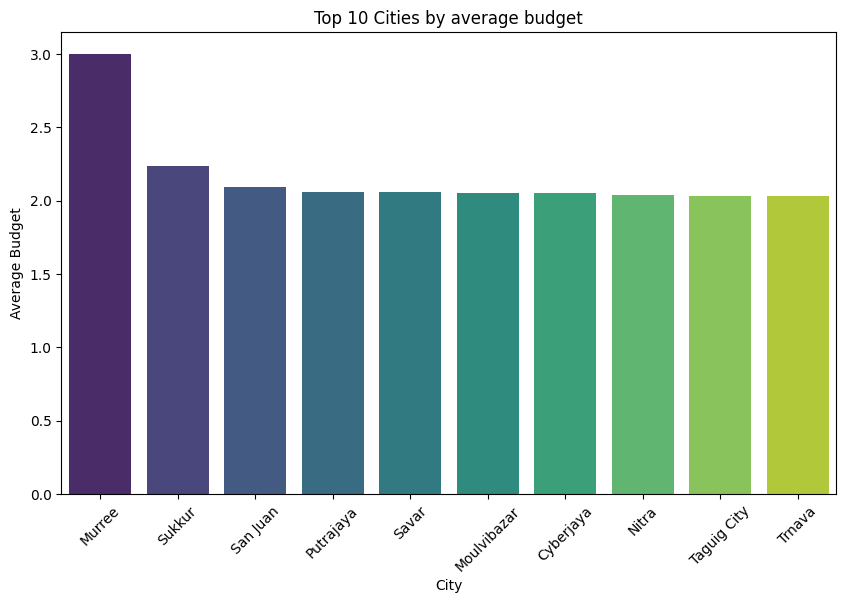

In [23]:
city_budget_mean = df.groupby('city')['budget'].mean().sort_values(ascending=False)
top_10_cities = city_budget_mean.head(10)

# plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='viridis')

plt.xticks(rotation=45)
plt.title('Top 10 Cities by average budget')
plt.xlabel('City')
plt.ylabel('Average Budget')
plt.show()

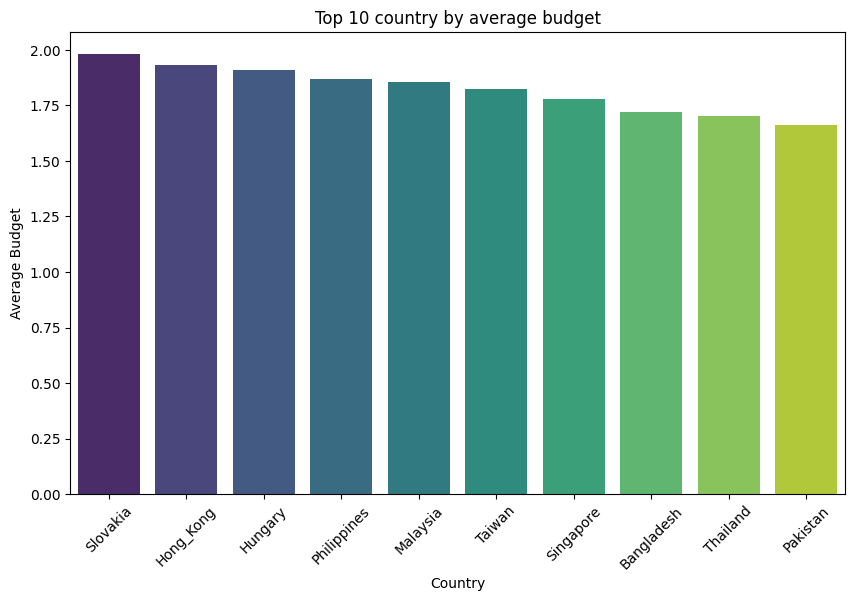

In [24]:
country_budget_mean = df.groupby('country')['budget'].mean().sort_values(ascending=False)
top_10_country = country_budget_mean.head(10)

# plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_10_country.index, y=top_10_country.values, palette='viridis')

plt.xticks(rotation=45)
plt.title('budget distribution by country')
plt.xlabel('Country')
plt.ylabel('Average Budget')
plt.show()

# How budget influences minimum delivery time

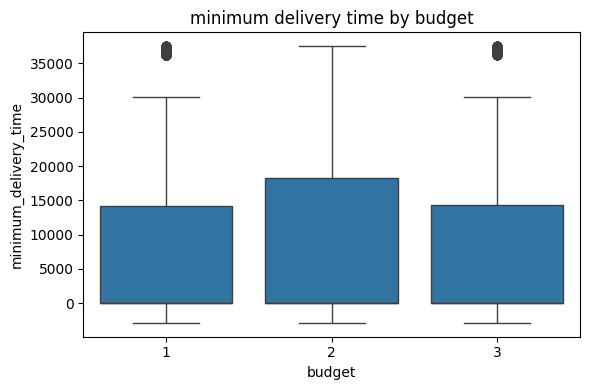

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='budget', y='minimum_delivery_time', data=df)
plt.title('minimum delivery time by budget')
plt.tight_layout()
plt.show()
           

# Minimum Delivery Time by Country

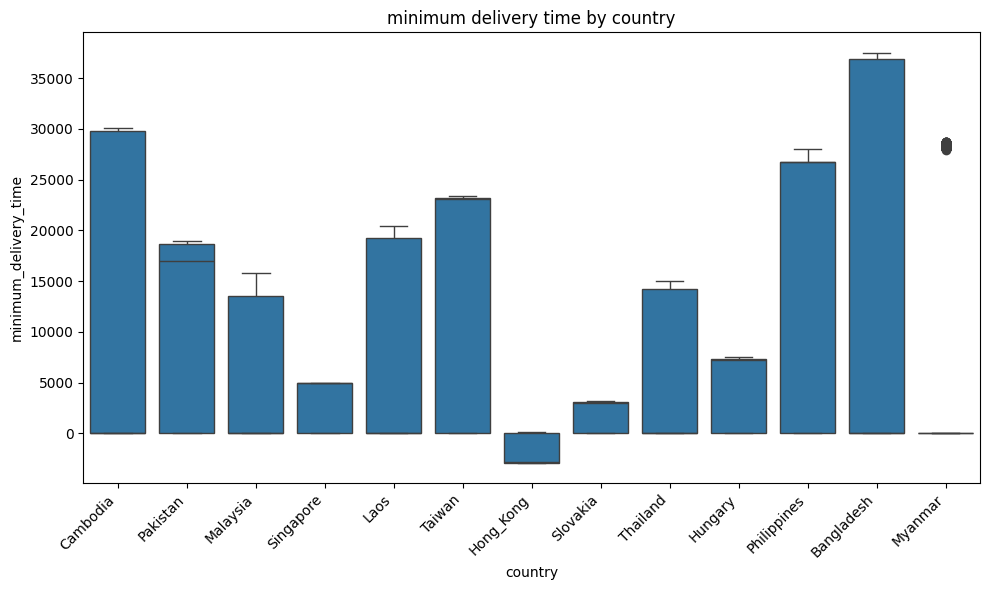

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='country', y='minimum_delivery_time', data=df)
plt.title('minimum delivery time by country')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()
           

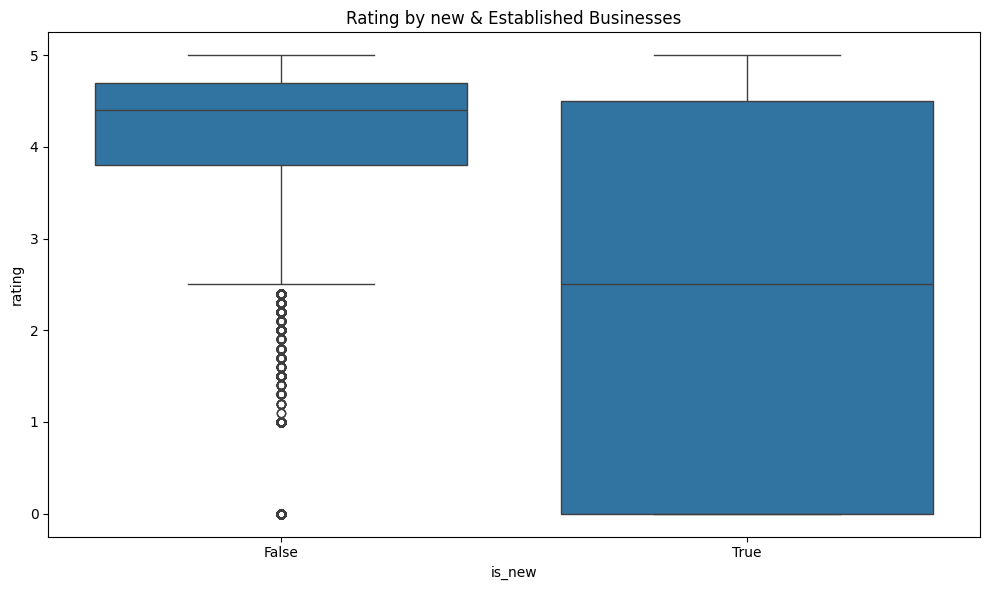

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x='is_new',y='rating',data=df)
plt.title('Rating by new & Established Businesses')
plt.tight_layout()
plt.show()


# Comparing Minimum Delivery Time by Dine-In Option

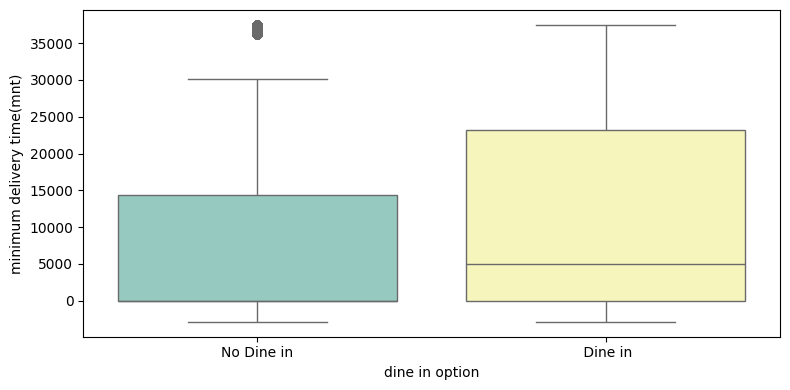

In [63]:
dine_in_state=df.groupby('dine_in')['minimum_delivery_time'].describe()
plt.figure(figsize=(8,4))
sns.boxplot(x='dine_in', y='minimum_delivery_time', data=df, palette='Set3')
plt.xlabel('dine in option')
plt.ylabel('minimum delivery time(mnt)')
plt.xticks([0,1],['No Dine in', ' Dine in'])

plt.tight_layout()
plt.show()
           

           

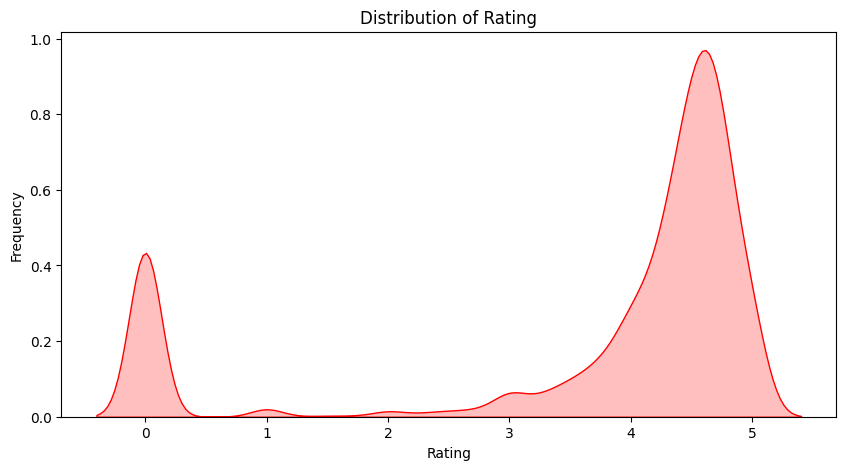

In [12]:
# Plot histogram + KDE for rating
plt.figure(figsize=(10,5))
sns.kdeplot(df['rating'], fill=True, color='red', label='Rating')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Trends Over the Years

In [18]:
df['year'] = pd.to_datetime(df['is_new_until'], errors='coerce').dt.year

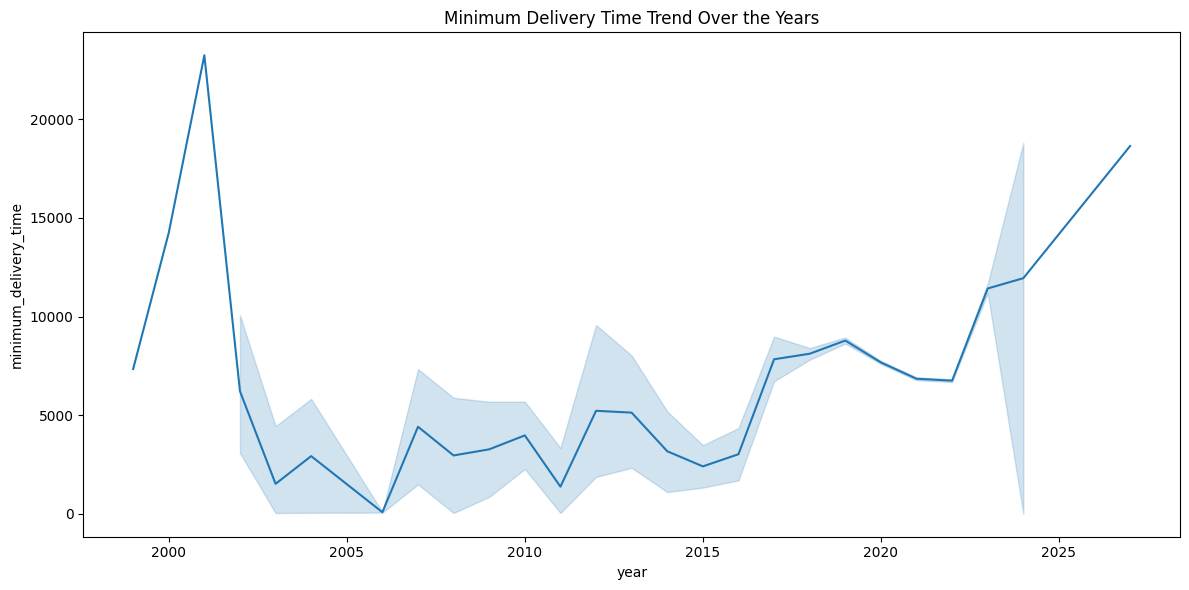

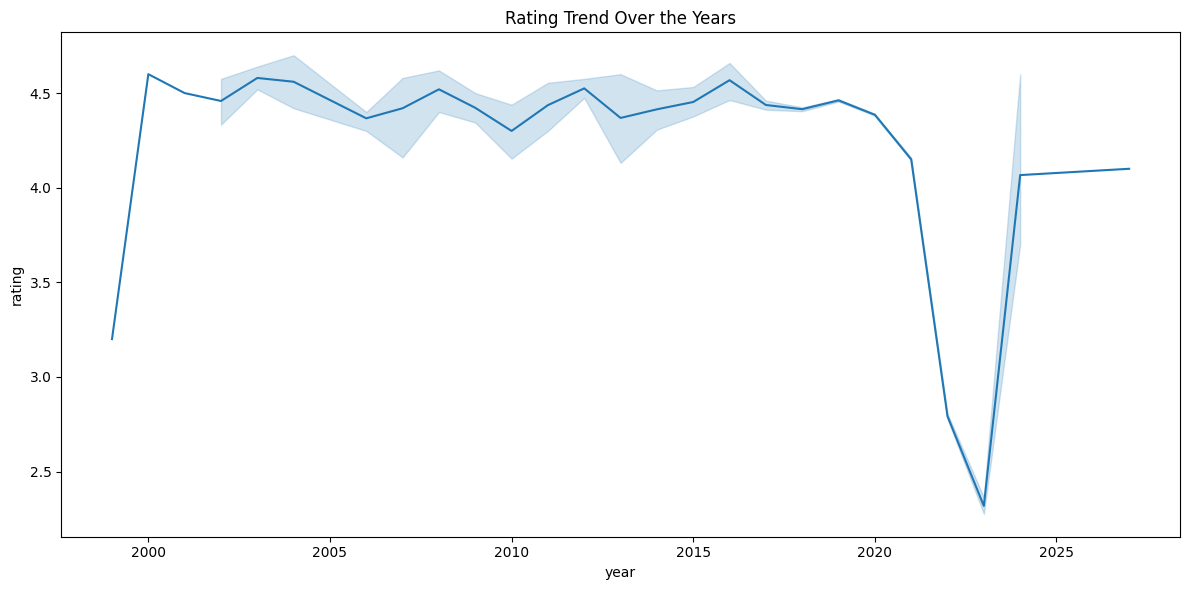

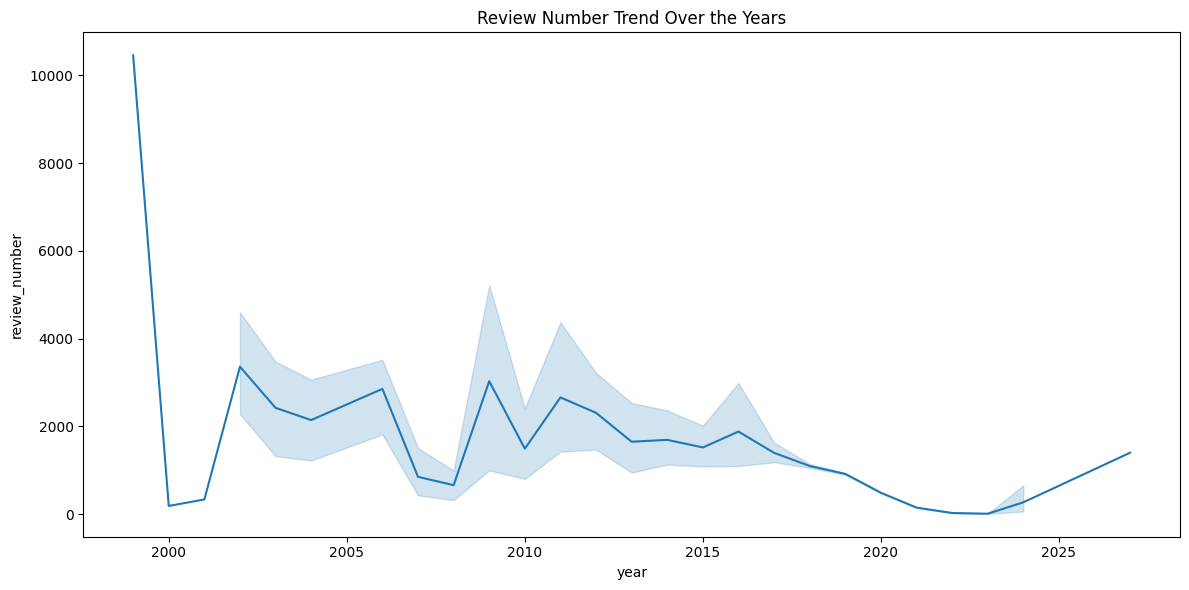

In [19]:
# Delivery Time Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='minimum_delivery_time', data=df)
plt.title('Minimum Delivery Time Trend Over the Years')
plt.tight_layout()
plt.show()

# Rating Trend Over The Year

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rating', data=df)
plt.title('Rating Trend Over the Years')
plt.tight_layout()
plt.show()

#Review Number Trend

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='review_number', data=df)
plt.title('Review Number Trend Over the Years')
plt.tight_layout()
plt.show()

# Geographic Clusters and Delivery Performance in Urban vs. Rural Areas

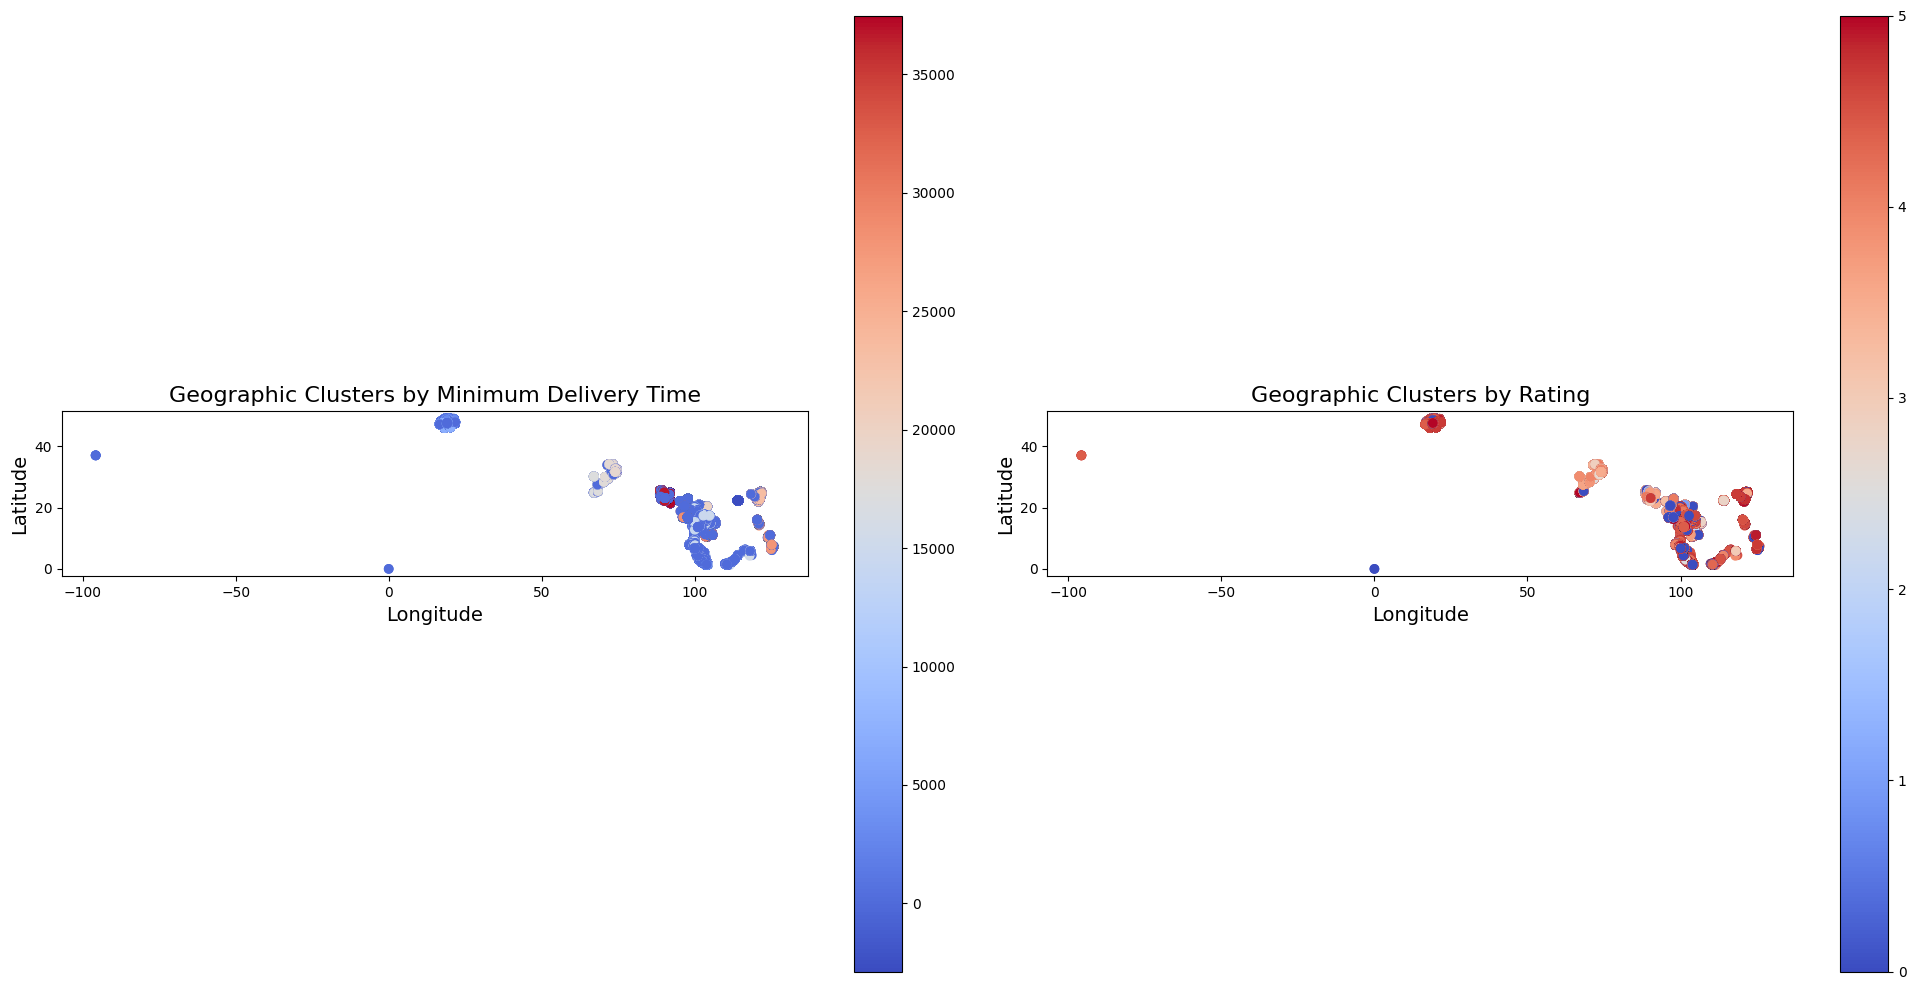

In [74]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot Delivery Time Clusters
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
gdf.plot(column='minimum_delivery_time', cmap='coolwarm', legend=True, ax=ax[0])
ax[0].set_title('Geographic Clusters by Minimum Delivery Time', fontsize=16)
ax[0].set_xlabel('Longitude', fontsize=14)
ax[0].set_ylabel('Latitude', fontsize=14)

# Plot Rating Clusters
gdf.plot(column='rating', cmap='coolwarm', legend=True, ax=ax[1])
ax[1].set_title('Geographic Clusters by Rating', fontsize=16)
ax[1].set_xlabel('Longitude', fontsize=14)
ax[1].set_ylabel('Latitude', fontsize=14)

plt.tight_layout()
plt.show()